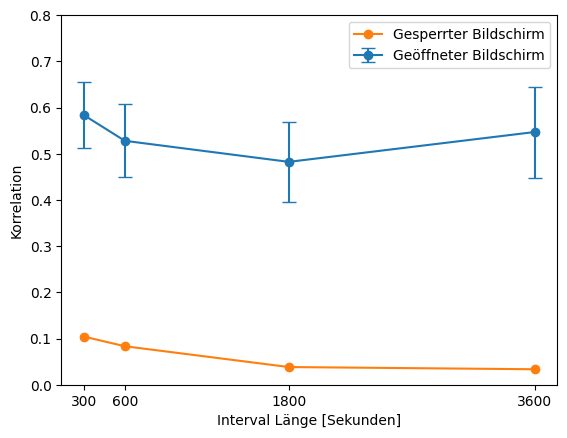

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Analyse\ResultMatchRate\EigenImpl"
outfolder = r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images"

closePath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Android_Closed\ResultMatchRates_2023-07-03-18-28-09.json"

paths = os.listdir(rootPath)
pathsAdd = [r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Analyse\ResultMatchRate\EigenImpl\ResultMatchRates_2023-06-28-13-27-10.json",
         r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons\ResultMatchRates_4.json",
         r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons\ResultMatchRates_Evening.json",
         r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons\ResultMatchRates_second.json",
         r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons\ResultMatchRates_daytime.json"
         ]
paths = paths + pathsAdd

TPObsList = {}
obslenList = [300, 600, 1800, 3600]

tpClosedGraph = []

x = np.arange(len(obslenList))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

means = []
stds = []

with open(closePath, "r") as file:
    data = json.load(file)

    for obsLen in obslenList:
        for interval in data["Item1"]["_results"]:
            if interval["IntervalLen"] == obsLen:
                tpClosedGraph.append(interval["TP"])
                break


for obsLen in obslenList:
    tp_values = []
    for file_path in paths:
        # JSON-Daten aus der Datei laden
        with open(os.path.join(rootPath, file_path), "r") as file:
            data = json.load(file)

        for interval in data["Item1"]["_results"]:
            if interval["IntervalLen"] == obsLen:
                tp_values.append(interval["TP"])
                break

    mean = np.mean(tp_values)
    std = np.std(tp_values)

    means.append(mean)
    stds.append(std)

ax.errorbar(obslenList, means, yerr=stds, fmt='o-', capsize=5, label='Geöffneter Bildschirm')
ax.plot(obslenList, tpClosedGraph,'o-', label="Gesperrter Bildschirm")
ax.set_xlabel('Interval Länge [Sekunden]')
ax.set_ylabel('Korrelation')
ax.set_ylim(0,0.8)
ax.set_xticks(obslenList)
ax.set_xticklabels(obslenList)
ax.legend()

plt.savefig(os.path.join(outfolder, 'OpenClosed.png'), dpi=300)
plt.show()


C:\Users\Linus\AppData\Local\Temp\ipykernel_10572\3270647222.py:25: RuntimeWarning: invalid value encountered in scalar divide
  cv = np.std(sub_values) / np.mean(sub_values)


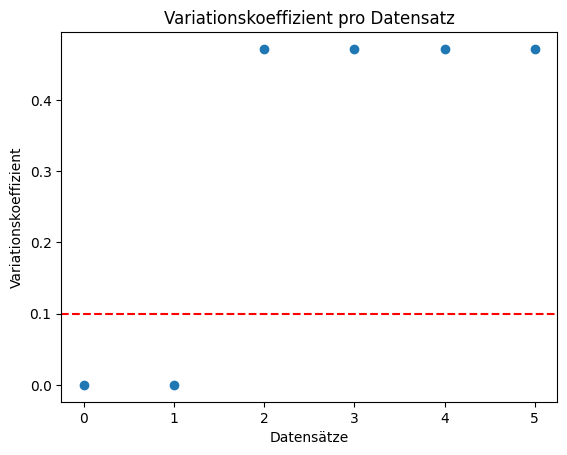

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Beispiel JSON-Daten
data = {
    "Item1": {
        "300": [1, 2, 3, 4, 5],
        "600": [2, 4, 6, 8, 10],
        "1800": [1, 1, 1, 1, 1],
        "3600": [0, 0, 0, 0, 0]
    },
    "Item2": {
        "300": [0, 0, 0, 0, 0],
        "600": [1, 2, 3, 4, 5],
        "1800": [1, 1, 1, 1, 1],
        "3600": [2, 4, 6, 8, 10]
    }
}

# Variationskoeffizienten berechnen
cv_values = []
for key, values in data.items():
    for sub_key, sub_values in values.items():
        cv = np.std(sub_values) / np.mean(sub_values)
        cv_values.append(cv)

# Datensätze in aufsteigender Reihenfolge des Variationskoeffizienten sortieren
sorted_indices = np.argsort(cv_values)
sorted_cv_values = np.array(cv_values)[sorted_indices]

# Streudiagramm erstellen
plt.scatter(range(len(sorted_cv_values)), sorted_cv_values)
plt.axhline(y=0.1, color='r', linestyle='--')  # Beispiel-Schwellenwert
plt.xlabel("Datensätze")
plt.ylabel("Variationskoeffizient")
plt.title("Variationskoeffizient pro Datensatz")
plt.show()


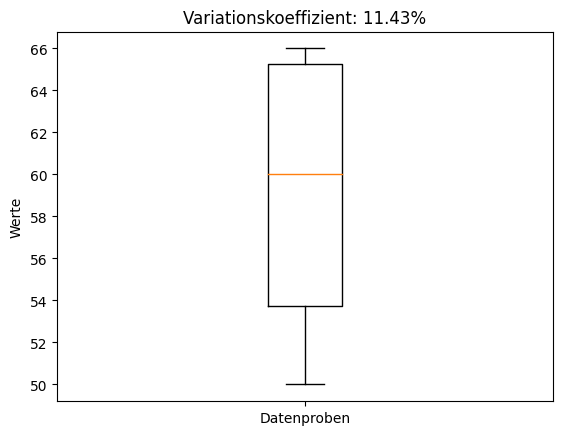

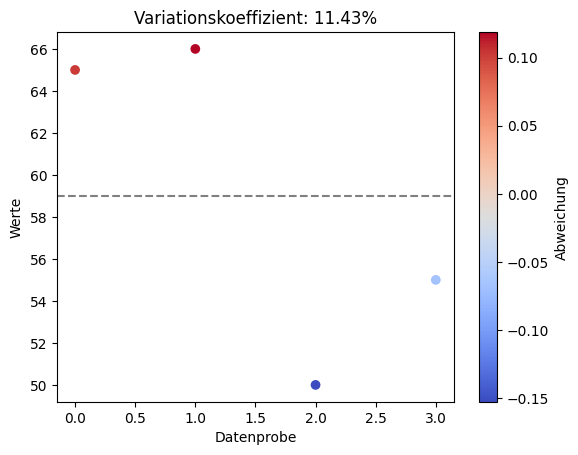

Quartildispersionskoeffizient: 19.17%


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datenproben
daten = [65, 66, 50, 55]

# Berechnung des Variationskoeffizienten
coefficient_of_variation = (np.std(daten) / np.mean(daten)) * 100

# Boxplot
plt.boxplot([daten], labels=['Datenproben'])
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()

# Streudiagramm
deviations = [(x - np.mean(daten)) / np.mean(daten) for x in daten]
plt.scatter(range(len(daten)), daten, c=deviations, cmap='coolwarm')
plt.axhline(np.mean(daten), color='gray', linestyle='--')
plt.colorbar(label='Abweichung')
plt.xlabel('Datenprobe')
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()



# Berechnung des Interquartilsbereichs (IQR)
q1 = np.percentile(daten, 25)
q3 = np.percentile(daten, 75)
iqr = q3 - q1

# Berechnung des Quartildispersionskoeffizienten
median = np.median(daten)
quartile_dispersion_coefficient = (iqr / median) * 100

# Ausgabe des Ergebnisses
print("Quartildispersionskoeffizient: {:.2f}%".format(quartile_dispersion_coefficient))



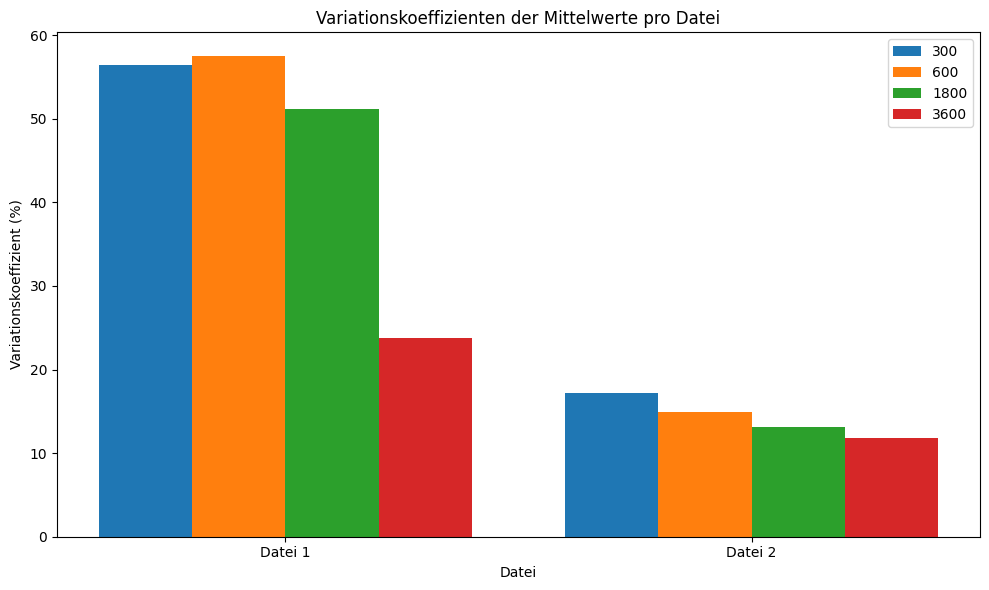

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Array von JSON-Daten (Beispiel)
data_array = [
    {
        "Item1": {
            "_results": [
                {"TP": 0.646551724137931, "FP": 0, "IntervalLen": 300},
                {"TP": 0.6143939393939394, "FP": 0, "IntervalLen": 600},
                {"TP": 0.5535714285714286, "FP": 0, "IntervalLen": 1800},
                {"TP": 0.6351686507936508, "FP": 0, "IntervalLen": 3600}
            ]
        },
        "Item2": {
            "300": [1, 1, 0.5, 0, 0, 0.5, 0.6666666666666666, 1, 0.3333333333333333, 1, 0.5, 1, 1, 1, 0.5, 0.6666666666666666, 0.5, 1, 0.3333333333333333, 0.3333333333333333, 0, 0.6666666666666666, 0.25, 1, 0, 1, 1, 1, 1],
            "600": [1, 1, 0.25, 0, 0.6, 0.5, 1, 0.75, 1, 0.5, 0.6666666666666666, 0.5, 0.5, 0.3333333333333333, 0, 0.6666666666666666, 0.25, 1, 0, 1, 1, 1],
            "1800": [0.625, 0.5, 0.8571428571428571, 0.5714285714285714, 0.375, 0.5, 0, 1],
            "3600": [0.5555555555555556, 0.7142857142857143, 0.4375, 0.8333333333333334]
        }
    },
    {
        "Item1": {
            "_results": [
                {"TP": 0.5, "FP": 0, "IntervalLen": 300},
                {"TP": 0.6, "FP": 0, "IntervalLen": 600},
                {"TP": 0.7, "FP": 0, "IntervalLen": 1800},
                {"TP": 0.8, "FP": 0, "IntervalLen": 3600}
            ]
        },
        "Item2": {
            "300": [0.5, 0.6, 0.7, 0.8],
            "600": [0.6, 0.7, 0.8, 0.9],
            "1800": [0.7, 0.8, 0.9, 1.0],
            "3600": [0.8, 0.9, 1.0, 1.1]
        }
    }
]

# Initialisiere Arrays für Variationskoeffizienten pro Interval
variation_coefficients_300 = []
variation_coefficients_600 = []
variation_coefficients_1800 = []
variation_coefficients_3600 = []

# Iteriere über die Dateien
for data in data_array:
    item2_data = data["Item2"]
    
    # Extrahiere Daten pro Interval
    data_300 = item2_data["300"]
    data_600 = item2_data["600"]
    data_1800 = item2_data["1800"]
    data_3600 = item2_data["3600"]
    
    # Berechne Mittelwerte pro Interval
    mean_300 = np.mean(data_300)
    mean_600 = np.mean(data_600)
    mean_1800 = np.mean(data_1800)
    mean_3600 = np.mean(data_3600)
    
    # Berechne Variationskoeffizienten pro Interval und füge sie zu den entsprechenden Arrays hinzu
    variation_coefficients_300.append(np.std(data_300) / mean_300 * 100)
    variation_coefficients_600.append(np.std(data_600) / mean_600 * 100)
    variation_coefficients_1800.append(np.std(data_1800) / mean_1800 * 100)
    variation_coefficients_3600.append(np.std(data_3600) / mean_3600 * 100)

# Grafische Darstellung
x = np.arange(len(data_array))  # x-Koordinaten für Balkendiagramme
width = 0.2  # Breite der Balken

fig, ax = plt.subplots(figsize=(10, 6))

# Balkendiagramme für Variationskoeffizienten pro Interval
ax.bar(x - 1.5 * width, variation_coefficients_300, width, label="300")
ax.bar(x - 0.5 * width, variation_coefficients_600, width, label="600")
ax.bar(x + 0.5 * width, variation_coefficients_1800, width, label="1800")
ax.bar(x + 1.5 * width, variation_coefficients_3600, width, label="3600")

ax.set_title("Variationskoeffizienten der Mittelwerte pro Datei")
ax.set_xlabel("Datei")
ax.set_ylabel("Variationskoeffizient (%)")
ax.set_xticks(x)
ax.set_xticklabels([f"Datei {i+1}" for i in range(len(data_array))])
ax.legend()

plt.tight_layout()
plt.show()
